### Analysis of MovieLens Data

We are provided with the MovieLens data collected by the GroupLens Research Project at the University of Minnesota.
In particular, the data was collected through the MovieLens web site (movielens.umn.edu), which records a number of users' ratings (1-5) towards their watched movies. Besides, simple demographic info (e.g., age and gender) for the users and descriptive info (e.g., title and genre) for the movies are provided. 

Originally, there are several separate files to record the user-movie rating info, user demographic info and movie descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'movielens_data.csv'. The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | rating | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __rating__ - the user's rating towards the movie
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may rate multiple movies and a same movie (i.e., a same movieId) may receive ratings from multiple users.

There are four questions to explore with the data as shown below.

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * age/gender/rating is missing
 * occupation is 'none'

__Print the length of the data__ before and after removing the missing data.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('files/movielens_data.csv')
print(df.head())
print(df.count())
print(df.shape)

   userId   age gender  occupation  movieId  rating     genre  timestamp
0     196  49.0      M      writer      242     3.0    Comedy  881250949
1     186  39.0      F   executive      302     NaN     Crime  891717742
2      22  25.0      M      writer      377     1.0  Children  878887116
3     244  28.0      M  technician       51     2.0   Romance  880606923
4     166  47.0    NaN    educator      346     1.0     Drama  886397596
userId        100000
age            99984
gender         99983
occupation    100000
movieId       100000
rating         99984
genre         100000
timestamp     100000
dtype: int64
(100000, 8)


In [3]:
df = df.dropna(subset=['age', 'gender', 'rating'])
df = df[~df['occupation'].isin(['none'])]
print(df.head())
print(df.count())
print(df.shape)

   userId   age gender  occupation  movieId  rating      genre  timestamp
0     196  49.0      M      writer      242     3.0     Comedy  881250949
2      22  25.0      M      writer      377     1.0   Children  878887116
3     244  28.0      M  technician       51     2.0    Romance  880606923
5     298  44.0      M   executive      474     4.0        War  884182806
7     253  26.0      F   librarian      465     5.0  Adventure  891628467
userId        99022
age           99022
gender        99022
occupation    99022
movieId       99022
rating        99022
genre         99022
timestamp     99022
dtype: int64
(99022, 8)


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 


In [4]:
# Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
total_user = df['userId'].nunique()
total_occu = df['occupation'].nunique()
total_mov = df['movieId'].nunique()
total_genre = df['genre'].nunique()
print(f'total number of unique users: {total_user}')
print(f'total number of unique occupations: {total_occu}')
print(f'total number of unique movies: {total_mov}')
print(f'total number of unique genres: {total_genre}')

total number of unique users: 934
total number of unique occupations: 20
total number of unique movies: 1682
total number of unique genres: 19


In [5]:
# Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
df['rating'].describe()

count    99022.000000
mean         3.527792
std          1.125743
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [6]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user
df.groupby("userId").describe()['rating']

,count,mean,std,min,25%,50%,75%,max
userId,,,,,,,,
1,272.0,3.610294,1.263585,1.0,3.0,4.0,5.0,5.0
2,62.0,3.709677,1.030472,1.0,3.0,4.0,4.0,5.0
3,54.0,2.796296,1.219026,1.0,2.0,3.0,4.0,5.0
4,24.0,4.333333,0.916831,2.0,4.0,5.0,5.0,5.0
5,170.0,2.894118,1.363285,1.0,2.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
939,49.0,4.265306,0.974156,2.0,4.0,5.0,5.0,5.0
940,107.0,3.457944,1.012007,1.0,3.0,4.0,4.0,5.0
941,22.0,4.045455,0.898532,2.0,4.0,4.0,5.0,5.0


In [7]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie
df.groupby("movieId").describe()['rating']


,count,mean,std,min,25%,50%,75%,max
movieId,,,,,,,,
1,445.0,3.876404,0.927802,1.0,3.0,4.0,5.0,5.0
2,129.0,3.186047,0.958249,1.0,3.0,3.0,4.0,5.0
3,88.0,3.034091,1.188536,1.0,2.0,3.0,4.0,5.0
4,206.0,3.543689,0.955362,1.0,3.0,4.0,4.0,5.0
5,84.0,3.273810,0.935913,1.0,3.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
1678,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1679,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
1680,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/occupation/genre and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [12]:
"""explore the correlation between gender and ratings; 
do female/male users tend to provide higher ratings than male/female users? """
df.groupby('gender').describe()['rating']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,25353.0,3.530667,1.171820,1.0,3.0,4.0,4.0,5.0
M,73669.0,3.526802,1.109449,1.0,3.0,4.0,4.0,5.0


(array([1, 2]), [Text(1, 0, 'F'), Text(2, 0, 'M')])

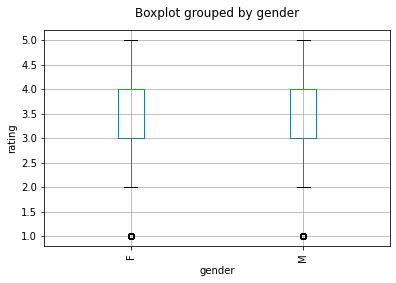

In [11]:
df.boxplot(column='rating', by='gender', )
ax = plt.gca()
ax.set_ylabel('rating')
ax.set_title('')
plt.xticks(rotation = 90)

In [14]:
# explore the correlation between occupation and ratings
df.groupby('occupation').describe()['rating']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
administrator,7473.0,3.635889,1.088204,1.0,3.0,4.0,4.0,5.0
artist,2308.0,3.653380,1.175664,1.0,3.0,4.0,5.0,5.0
doctor,539.0,3.690167,0.963322,1.0,3.0,4.0,4.0,5.0
educator,9436.0,3.671577,1.076276,1.0,3.0,4.0,4.0,5.0
engineer,8173.0,3.541539,1.068342,1.0,3.0,4.0,4.0,5.0
entertainment,2095.0,3.441050,1.183391,1.0,3.0,4.0,4.0,5.0
executive,3398.0,3.349029,1.324577,1.0,2.0,4.0,4.0,5.0
healthcare,2802.0,2.897216,1.270937,1.0,2.0,3.0,4.0,5.0
homemaker,299.0,3.301003,1.171401,1.0,3.0,3.0,4.0,5.0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'administrator'),
  Text(2, 0, 'artist'),
  Text(3, 0, 'doctor'),
  Text(4, 0, 'educator'),
  Text(5, 0, 'engineer'),
  Text(6, 0, 'entertainment'),
  Text(7, 0, 'executive'),
  Text(8, 0, 'healthcare'),
  Text(9, 0, 'homemaker'),
  Text(10, 0, 'lawyer'),
  Text(11, 0, 'librarian'),
  Text(12, 0, 'marketing'),
  Text(13, 0, 'other'),
  Text(14, 0, 'programmer'),
  Text(15, 0, 'retired'),
  Text(16, 0, 'salesman'),
  Text(17, 0, 'scientist'),
  Text(18, 0, 'student'),
  Text(19, 0, 'technician'),
  Text(20, 0, 'writer')])

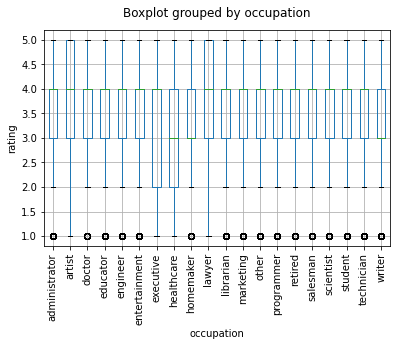

In [13]:
df.boxplot(column='rating', by='occupation', )
ax = plt.gca()
ax.set_ylabel('rating')
ax.set_title('')
plt.xticks(rotation = 90)

In [17]:
#explore the correlation between genre and ratings
df.groupby('genre').describe()['rating']

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,10211.0,3.455195,1.122308,1.0,3.0,4.0,4.0,5.0
Adventure,3969.0,3.420509,1.149287,1.0,3.0,4.0,4.0,5.0
Animation,1191.0,3.459278,1.144873,1.0,3.0,4.0,4.0,5.0
Children,2853.0,3.280056,1.147477,1.0,3.0,3.0,4.0,5.0
Comedy,17369.0,3.338764,1.149888,1.0,3.0,3.0,4.0,5.0
Crime,3272.0,3.706601,1.111395,1.0,3.0,4.0,5.0,5.0
Documentary,700.0,3.671429,1.202304,1.0,3.0,4.0,5.0,5.0
Drama,24198.0,3.688156,1.077806,1.0,3.0,4.0,4.0,5.0
Fantasy,557.0,3.515260,1.132515,1.0,3.0,4.0,4.0,5.0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Children'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Drama'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Film-Noir'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Musical'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Romance'),
  Text(15, 0, 'Sci-Fi'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western'),
  Text(19, 0, 'unknown')])

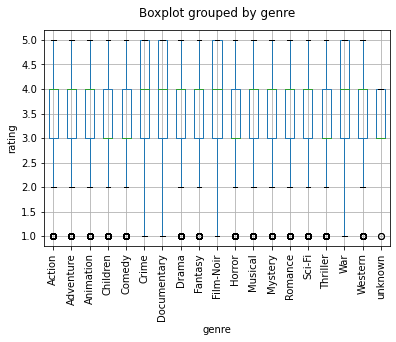

In [21]:
df.boxplot(column='rating', by='genre', )
ax = plt.gca()
ax.set_ylabel('rating')
ax.set_title('')
plt.xticks(rotation = 90)

# Discussions
After exploring the data, we obtained some apparent effects that seem to support our initial assumptions:
    
1. the average rating has no singnificent difference between men (mean of rating: 3.53, std: 1.17) and women (mean of rating: 3.53, std: 1.11); 
2. among 20 occupations, lawyer, doctor and artist rate a little bit high than people of other occupations while healthcare, executive and homemaker rate the lowest;
3. for different type of movie, crime, film-noir, war, western, war and documentary are higher rated than other types, movies without paritcular type (unknown type) are rated the lowest.

#### Q4. Detect and remove outliers

We may define outlier users and movies with three rules:

* users whose age is no more than 10
* users who rate less than 20 movies
* movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
 
Please remove the corresponding records in the csv file that involves outlier users and movies. After that, __print the length of the data__.

In [ ]:
# drop users whose age is no more than 10
df.drop(df.index[df['age']<=10])

In [ ]:
# drop users who rate less than 20 movies
df_OL2 = df.groupby('userId').filter(lambda x : len(x)>=20)
df_OL2.shape

In [ ]:
# movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
df_OL3 = df_OL2.groupby('movieId').filter(lambda x : len(x)>=10)
df_OL3.shape